In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
def plot_sample(x, y, index):
  plt.figure(figsize = (15, 2))
  plt.imshow(x_train[index])
  plt.xlabel(classes[y[index]])

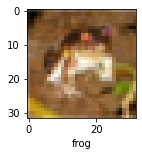

In [ ]:
plot_sample(x_train, y_train, 0)

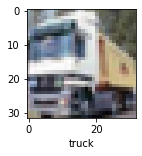

In [ ]:
plot_sample(x_train, y_train, 1)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [ ]:
# Using the simple ANN:

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid'),
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 106s 67ms/step - loss: 1.8131 - accuracy: 0.3555
Epoch 2/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.6238 - accuracy: 0.4278
Epoch 3/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.5421 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.4819 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.4344 - accuracy: 0.4953


In [ ]:
# Now using the pulling layer:

In [ ]:
 cnn = models.Sequential([
        # CNN:
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        # Dense:
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax'),
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'],
            )

In [ ]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4493 - accuracy: 0.4784
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.0915 - accuracy: 0.6178
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9706 - accuracy: 0.6596
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8930 - accuracy: 0.6895
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8260 - accuracy: 0.7120
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7692 - accuracy: 0.7342
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7160 - accuracy: 0.7517
Epoch 8/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.6718 - accuracy: 0.7661
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6275 - accuracy: 0.7806
Epoch 10/10
1563/1563 [==============================] - 67s 43m

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9345 - accuracy: 0.6958


[0.9344759583473206, 0.6958000063896179]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[2.20910093e-04, 2.59130116e-04, 1.19690700e-02, 9.50786114e-01,
        1.18878968e-04, 1.57894362e-02, 2.02487465e-02, 1.00822836e-05,
        5.82119974e-04, 1.55231392e-05],
       [9.72176529e-03, 2.50237565e-02, 1.56593455e-06, 1.12218956e-07,
        3.75218150e-08, 1.33541604e-08, 2.05056527e-09, 5.98246643e-08,
        9.63678658e-01, 1.57392374e-03],
       [1.32078633e-01, 3.18683416e-01, 9.96591523e-04, 3.38109187e-03,
        2.15287888e-04, 7.50290055e-04, 1.03957704e-04, 2.97527120e-04,
        3.18251520e-01, 2.25241631e-01],
       [8.15856338e-01, 1.00714969e-03, 3.75122130e-02, 2.57538143e-03,
        1.74220710e-03, 4.20076576e-05, 1.52402543e-04, 7.98027104e-05,
        1.40972704e-01, 5.98278057e-05],
       [1.27375301e-06, 1.98886937e-06, 1.17397988e-02, 1.26928966e-02,
        6.37811780e-01, 4.93103638e-04, 3.37249458e-01, 4.31690921e-07,
        9.33676438e-06, 2.68637326e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

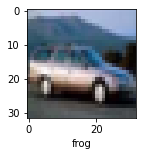

In [ ]:
plot_sample(x_test, y_test, 4)